<a href="https://colab.research.google.com/github/pizzapuppies/Youssif_FYP_Code/blob/main/VAE_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
import csv
import random
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def norm(i):
  maxi = 10000
  return float(i)/maxi

ld = 3

In [ ]:
#@title spliting the data

data = {"n":[]}

with open("/content/gdrive/My Drive/data.csv","r") as rfile:
  line = 0

  reader  = csv.reader(rfile)
  real,imag = [],[]

  for row in reader:
    label = row[0] if "n" not in row[0] else "n"
    
    if label not in data.keys():
      data[label] = []
    temp =[]


    real,imag = list(map(norm,row[1:51])),list(map(norm,row[51:]))
    for i in range(len(real)):
      temp.append([real[i],imag[i]])
    
    
    data[label].append(temp)




lim = 70
for key in data.keys():
  temp = data[key]
  while len(temp) < lim:
    r = random.randint(0,len(data[key])-1)
    temp.append(data[key][r])

  
split = 14 #number of test cases per class
x_train = []
y_train = []
x_test =  []
y_test =  []
X,y = [],[]

for key in data.keys():
  X = X + data[key]
  for _ in range(len(data[key])):
    y.append(key)
  
X = np.array(X)
print(X.shape)

(560, 50, 2)


In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

latent_dim = ld

encoder_inputs = keras.Input(shape=(50,2))
x = layers.Conv1D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv1D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 2)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 25, 32)       224         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 13, 64)       6208        ['conv1d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 832)          0           ['conv1d_1[0][0]']               
                                                                                            

In [ ]:
latent_dim = ld

encoder_inputs = keras.Input(shape=(50, 2))
x = layers.Conv1D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv1D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 2)]      0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 25, 32)       224         ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 13, 64)       6208        ['conv1d_2[0][0]']               
                                                                                                  
 flatten_1 (Flatten)            (None, 832)          0           ['conv1d_3[0][0]']               
                                                                                            

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(50* 64, activation="relu")(latent_inputs)

x = layers.Reshape((50, 64))(x)
x = layers.Conv1DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv1DTranspose(1, 3, activation="sigmoid", padding="same")(x)

decoder_outputs = layers.Reshape((50, 2))(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_14 (Dense)            (None, 3200)              12800     
                                                                 
 reshape (Reshape)           (None, 50, 64)            0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 100, 64)          12352     
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 100, 1)           193       
 ranspose)                                                       
                                                                 
 reshape_1 (Reshape)         (None, 50, 2)             0   

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [ ]:


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(X, epochs=500, batch_size=50)


Epoch 1/500
12/12 [==============================] - 3s 14ms/step - loss: 33.2462 - reconstruction_loss: 31.9907 - kl_loss: 0.1744
Epoch 2/500
12/12 [==============================] - 0s 14ms/step - loss: 26.5854 - reconstruction_loss: 23.8450 - kl_loss: 0.9530
Epoch 3/500
12/12 [==============================] - 0s 13ms/step - loss: 19.1077 - reconstruction_loss: 17.6693 - kl_loss: 0.4835
Epoch 4/500
12/12 [==============================] - 0s 12ms/step - loss: 15.8691 - reconstruction_loss: 15.5195 - kl_loss: 0.0840
Epoch 5/500
12/12 [==============================] - 0s 14ms/step - loss: 14.8220 - reconstruction_loss: 14.7348 - kl_loss: 0.0155
Epoch 6/500
12/12 [==============================] - 0s 13ms/step - loss: 14.5100 - reconstruction_loss: 14.4263 - kl_loss: 0.0027
Epoch 7/500
12/12 [==============================] - 0s 13ms/step - loss: 14.2560 - reconstruction_loss: 14.2086 - kl_loss: 0.0019
Epoch 8/500
12/12 [==============================] - 0s 13ms/step - loss: 14.0806 -

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 66ms/step


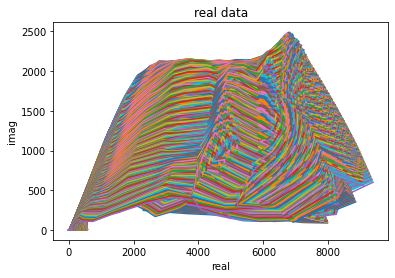

In [ ]:
with open("/content/gdrive/My Drive/vae_data_unlabeled.csv","w") as wfile:
  pass

for i1 in np.linspace(-20, 20, 25):
  for i2 in np.linspace(-20, 20, 25):
      for i3 in np.linspace(-20, 20, 25):
        z_sample = np.array([[i1,i2,i3]])
        x_decoded = vae.decoder.predict(z_sample)


        from matplotlib import pyplot as plt
        x,y = [],[]
        for i in x_decoded[0]:
          x.append(i[0]*10000)
          y.append(i[1]*10000)
        with open("/content/gdrive/My Drive/vae_data_unlabeled.csv","a") as wfile:
          writer = csv.writer(wfile)
          writer.writerow([x,y])


        plt.plot(x,y)

plt.title("real data")
plt.ylabel("imag")
plt.xlabel("real")
plt.show()

In [ ]:
data= []
with open("/content/gdrive/My Drive/vae_data_unlabeled.csv","r") as rfile:
  reader = csv.reader(rfile)

  for row in reader:
    #print(row)
    real = eval(row[0])
    imag = eval(row[1])
    data.append(real + imag)

print(len(data))

15625


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)

X_train,y_train = [],[]
with open("/content/gdrive/My Drive/data.csv","r") as rfile:
  

  reader  = csv.reader(rfile)
  real,imag = [],[]

  for row in reader:
    y_train.append(row[0])
    real,imag = list(map(float,row[1:51])),list(map(float,row[51:]))
    X_train.append([real,imag])

X_train = np.array(X_train).reshape(140,-1)
y_train = np.array(y_train).reshape(140,-1)

print(X_train.shape)
knn_model.fit(X_train, y_train)


(140, 100)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_data = knn_model.predict(data)

print(y_data)

['p32' 'p32' 'p32' ... 'p32' 'p32' 'p32']


Counter({'p32': 9469, 'p16': 5578, 'p8': 338, 'p2': 121, 'p1': 119})


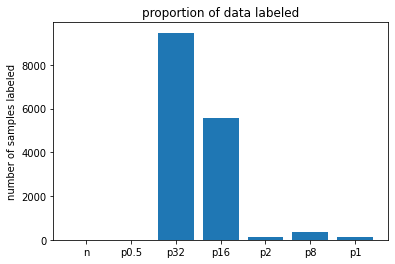

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

count = Counter(y_data)
print(count)
types = ["n","p0.5"]
counts = [0,0]
for key,num in count.items():
  types.append(key)
  counts.append(num)

ax.bar(types, counts)

ax.set_ylabel('number of samples labeled')
ax.set_title('proportion of data labeled')



plt.show()

In [ ]:
with open("/content/gdrive/My Drive/labeled_vae_data.csv",'w') as wfile:
  writer = csv.writer(wfile)
  for i in range(len(y_data)):
    writer.writerow([y_data[i]]+data[i])